### **🔹 1. Importing Libraries**


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
import kagglehub

from matplotlib import style
style.use('fivethirtyeight')

### 🌐 **2. Download Dataset from KaggleHub**

In [4]:
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


### 📂 **3. Set Dataset Paths & Image Parameters**

In [5]:
DATA_DIR ="/kaggle/input/gtsrb-german-traffic-sign"
TRAIN_PATH = os.path.join(DATA_DIR, "Train")
TEST_PATH = os.path.join(DATA_DIR, "Test")
IMG_HEIGHT, IMG_WIDTH, CHANNELS = 30, 30, 3
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

### 📊 **4. Number of Categories**


In [7]:
NUM_CATEGORIES = len(os.listdir(TRAIN_PATH))
print("Number of categories:", NUM_CATEGORIES)

Number of categories: 43


### 🚦 **5. Class Names Mapping**


In [28]:
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles >3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing vehicles > 3.5 tons'
}


### 🖼️ **6. Load and Preprocess Training Images**

In [8]:
data = []
labels = []

for category in range(NUM_CATEGORIES):
    category_path = os.path.join(TRAIN_PATH, str(category))
    for img_name in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMG_SIZE)
            data.append(img)
            labels.append(category)
        except Exception as e:
            print("Error loading image:", e)

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


### 🖼️ **7. Load and Preprocess Test Images**


In [10]:
test_csv = pd.read_csv(os.path.join(DATA_DIR, "Test.csv"))

y_test = test_csv["ClassId"].values
img_paths = test_csv["Path"].values

X_test = []

for img_path in img_paths:
    img = cv2.imread(os.path.join(DATA_DIR, img_path))
    img = cv2.resize(img, IMG_SIZE)
    X_test.append(img)

X_test = np.array(X_test)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Test data shape: (12630, 30, 30, 3)
Test labels shape: (12630,)


### ⚡ **8. Normalize Data and One-Hot Encode Labels**


In [11]:
data = data / 255.0
X_test = X_test / 255.0

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(labels, NUM_CATEGORIES)
y_test_cat = to_categorical(y_test, NUM_CATEGORIES)


### 🏗️ **9. Build and Compile CNN Model**


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(NUM_CATEGORIES, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,547 (927.92 KB)

 Trainable params: 236,587 (924.17 KB)

 Non-trainable params: 960 (3.75 KB)

### ⚡ **10. Define Callbacks for Training**


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]


### 🏃 **11. Train the CNN Model**


In [14]:
EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(
    data, y_train,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3637 - loss: 2.5811
Epoch 1: val_accuracy improved from -inf to 0.84315, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.3640 - loss: 2.5794 - val_accuracy: 0.8432 - val_loss: 0.5464 - learning_rate: 0.0010
Epoch 2/30
612/613 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8753 - loss: 0.3996
Epoch 2: val_accuracy improved from 0.84315 to 0.94030, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8754 - loss: 0.3993 - val_accuracy: 0.9403 - val_loss: 0.1927 - learning_rate: 0.0010
Epoch 3/30
601/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.1975
Epoch 3: val_accuracy improved from 0.94030 to 0.95416, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9398 - loss: 0.1971 - val_accuracy: 0.9542 - val_loss: 0.1528 - learning_rate: 0.0010
Epoch 4/30
606/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1301
Epoch 4: val_accuracy improved from 0.95416 to 0.96231, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9601 - loss: 0.1301 - val_accuracy: 0.9623 - val_loss: 0.1272 - learning_rate: 0.0010
Epoch 5/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.1032
Epoch 5: val_accuracy improved from 0.96231 to 0.97134, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9680 - loss: 0.1032 - val_accuracy: 0.9713 - val_loss: 0.0985 - learning_rate: 0.0010
Epoch 6/30
604/613 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9705 - loss: 0.0941
Epoch 6: val_accuracy did not improve from 0.97134
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9705 - loss: 0.0940 - val_accuracy: 0.9549 - val_loss: 0.1495 - learning_rate: 0.0010
Epoch 7/30
606/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9744 - loss: 0.0806
Epoch 7: val_accuracy did not improve from 0.97134
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9745 - loss: 0.0806 - val_accuracy: 0.9637 - val_loss: 0.1262 - learning_rate: 0.0010
Epoch 8/30
611/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0660
Epoch 8: val_accuracy did not improve from 0.97134

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9804 - loss: 0.0660 - val_accuracy

613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9773 - val_loss: 0.0769 - learning_rate: 5.0000e-04
Epoch 10/30
609/613 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9859 - loss: 0.0413
Epoch 10: val_accuracy improved from 0.97728 to 0.97926, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9859 - loss: 0.0413 - val_accuracy: 0.9793 - val_loss: 0.0720 - learning_rate: 5.0000e-04
Epoch 11/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9891 - loss: 0.0344
Epoch 11: val_accuracy did not improve from 0.97926
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9770 - val_loss: 0.0797 - learning_rate: 5.0000e-04
Epoch 12/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0330
Epoch 12: val_accuracy improved from 0.97926 to 0.97933, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9793 - val_loss: 0.0744 - learning_rate: 5.0000e-04
Epoch 13/30
607/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0320
Epoch 13: val_accuracy improved from 0.97933 to 0.97981, saving model to best_model.h5


613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9798 - val_loss: 0.0677 - learning_rate: 5.0000e-04
Epoch 14/30
609/613 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0285
Epoch 14: val_accuracy did not improve from 0.97981
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9730 - val_loss: 0.0943 - learning_rate: 5.0000e-04
Epoch 15/30
607/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0275
Epoch 15: val_accuracy did not improve from 0.97981
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9755 - val_loss: 0.0936 - learning_rate: 5.0000e-04
Epoch 16/30
601/613 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0260
Epoch 16: val_accuracy did not improve from 0.97981

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9919 - loss: 0.

613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9808 - val_loss: 0.0679 - learning_rate: 2.5000e-04
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 13.


### 📈 **12. Plot Training and Validation Accuracy**


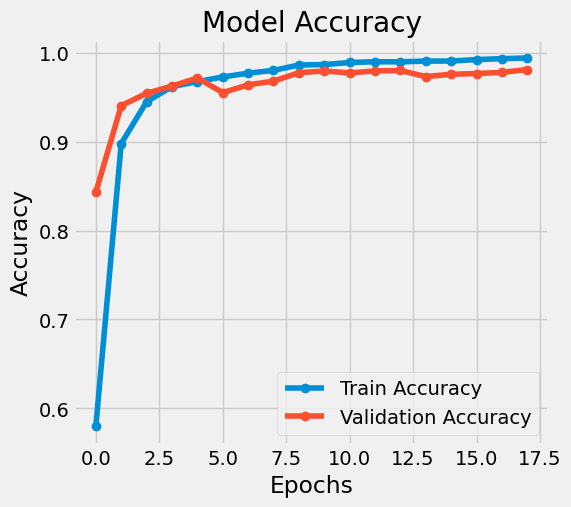

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

### 📈 **13. Plot Training and Validation loss**


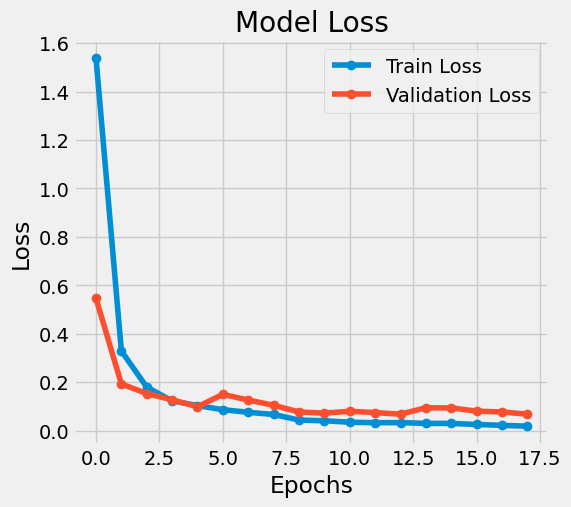

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

### 🖼️ **14. Visualize Random Test Images with Predictions**


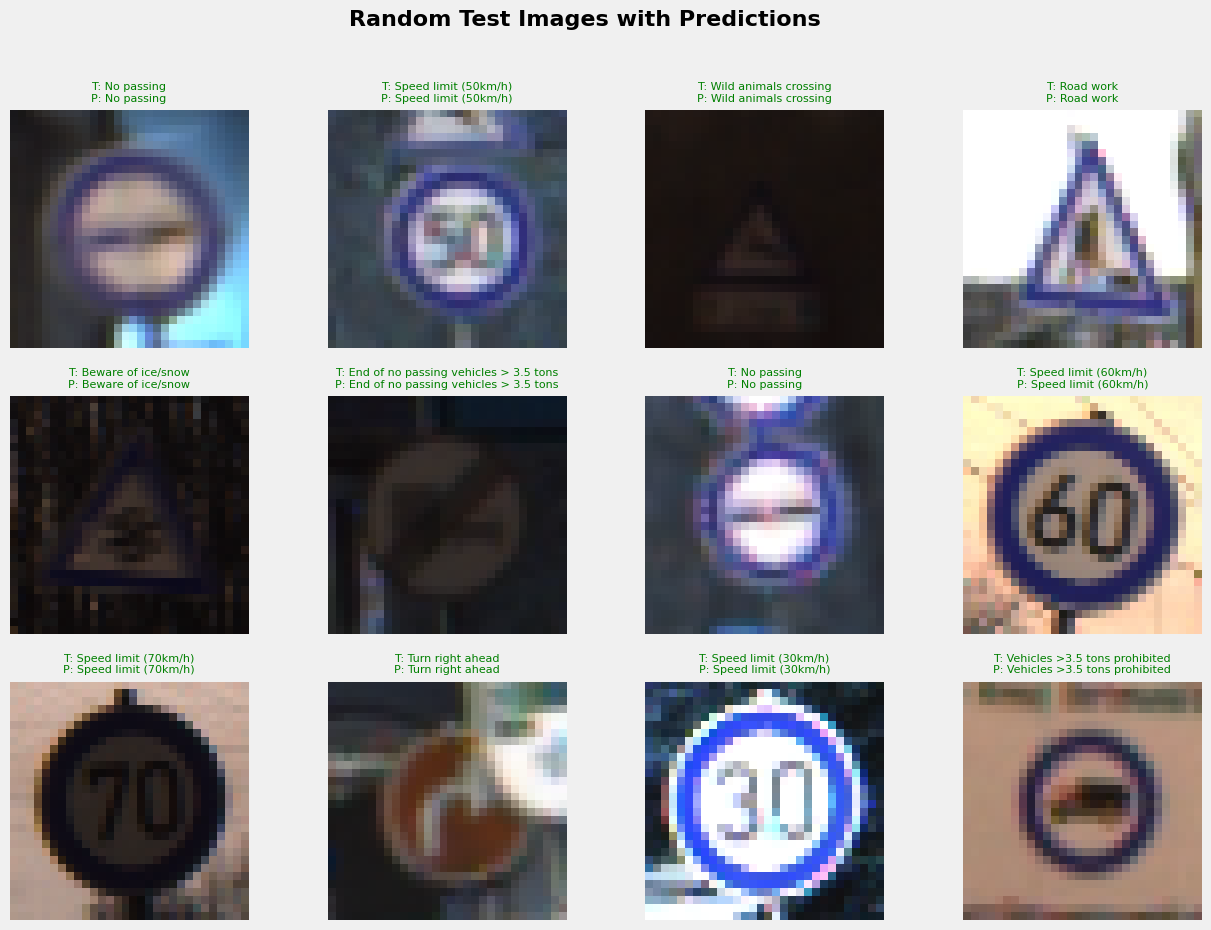

In [29]:
import random

indices = random.sample(range(len(X_test)), 12)

plt.figure(figsize=(14,10))
for i, idx in enumerate(indices):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])

    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]

    color = "green" if y_test[idx] == y_pred[idx] else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=8, color=color)
    plt.axis("off")

plt.suptitle("Random Test Images with Predictions", fontsize=16, fontweight="bold")
plt.show()
